In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [3]:
train_dataset_path = './dataset/train_preprocess.tsv'
valid_dataset_path = './dataset/valid_preprocess.tsv'
test_dataset_path = './dataset/test_preprocess.tsv'

In [4]:
train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)
test_df = pd.read_csv(test_dataset_path, sep='\t', header=None)

train_df.columns = ['text', 'label']
valid_df.columns = ['text', 'label']
test_df.columns = ['text', 'label']

In [5]:
train_df.head(10)

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
6,pakai kartu kredit bca tidak untung malah rugi...,negative
7,"tempat unik , bagus buat foto , makanan enak ,...",positive
8,saya bersama keluarga baru saja menikmati peng...,positive
9,bersyukur,positive


In [6]:
def get_label_idx(label):
    if label == 'positive':
        return 2
    if label == 'negative':
        return 1
    if label == 'neutral':
        return 0
train_df['label'] = train_df['label'].apply(get_label_idx)
valid_df['label'] = valid_df['label'].apply(get_label_idx)
test_df['label'] = test_df['label'].apply(get_label_idx)

In [7]:
train_df.head(10)

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,2
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,2
3,betapa bahagia nya diri ini saat unboxing pake...,2
4,duh . jadi mahasiswa jangan sombong dong . kas...,1
5,"makanan beragam , harga makanan di food stall ...",2
6,pakai kartu kredit bca tidak untung malah rugi...,1
7,"tempat unik , bagus buat foto , makanan enak ,...",2
8,saya bersama keluarga baru saja menikmati peng...,2
9,bersyukur,2


## Generate Padded Sequence

In [8]:
# Parameters

vocab_size = 20000
max_length = 100
embedding_dim = 8
trunc_type='post'
oov_tok = "<OOV>"

In [9]:
## Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate word index dictionary for the training sentences
tokenizer.fit_on_texts(train_df['text'])
word_index = tokenizer.word_index
print(word_index)

# Convert the training sentences into word sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert the validation sentences into word sequences
valid_sequences = tokenizer.texts_to_sequences(valid_df['text'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'nya': 2, 'yang': 3, 'dan': 4, 'di': 5, 'tidak': 6, 'saya': 7, 'dengan': 8, 'enak': 9, 'makanan': 10, 'tempat': 11, 'ini': 12, 'untuk': 13, 'makan': 14, 'juga': 15, 'ke': 16, 'ada': 17, 'sangat': 18, 'harga': 19, 'dari': 20, 'sini': 21, 'menu': 22, 'bandung': 23, 'karena': 24, 'banyak': 25, 'cukup': 26, 'bisa': 27, 'banget': 28, 'tapi': 29, 'kalau': 30, 'sudah': 31, 'restoran': 32, 'saja': 33, 'rasa': 34, 'itu': 35, 'kami': 36, 'rasanya': 37, 'jadi': 38, 'suasana': 39, 'malam': 40, 'nyaman': 41, 'buat': 42, 'jalan': 43, 'sekali': 44, 'adalah': 45, 'orang': 46, 'pelayanan': 47, 'ayam': 48, 'kita': 49, 'goreng': 50, 'sama': 51, 'bagus': 52, 'pemandangan': 53, 'nasi': 54, 'suka': 55, 'seperti': 56, 'lebih': 57, 'lagi': 58, 'teman': 59, 'datang': 60, 'mahal': 61, 'satu': 62, 'atau': 63, 'biasa': 64, 'ya': 65, 'lumayan': 66, 'hanya': 67, 'pilihan': 68, 'keluarga': 69, 'cocok': 70, 'kota': 71, 'saat': 72, 'sampai': 73, 'hari': 74, 'pas': 75, 'lokasi': 76, 'resto': 77, 'mau': 78,

In [10]:
train_padded[-1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 6135,  109,  461,  141,  313,   28, 2064,   52, 3273,
         52])

## Train the word2vec model

In [11]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['text']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=1, workers=4)

## Vectorize the Data

In [12]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [16]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[11001])
print(word)

('briefing', array([-0.09709471, -0.09937821,  0.11849149,  0.05869588,  0.04319085,
        0.08927226, -0.05038396,  0.11168459]))


In [18]:
# Ambil kalimat dari baris 11001 dalam dataset pelatihan
kalimat = train_df.iloc[11000]['text']

# Tokenisasi kalimat menjadi kata-kata individual
kata_kata = kalimat.split()

# Inisialisasi list untuk menyimpan nilai word embedding
nilai_embedding = []

# Iterasi melalui setiap kata dalam kalimat
for kata in kata_kata:
    # Dapatkan indeks kata dari kamus kata (word_index)
    indeks_kata = word_index.get(kata)
    # Jika kata ada dalam kamus kata, ambil nilai word embedding-nya
    if indeks_kata is not None:
        nilai_embedding.append(embedding_matrix[indeks_kata])
    else:
        # Jika kata tidak ada dalam kamus kata, nilai embedding-nya dianggap nol atau sesuai dengan token OOV
        nilai_embedding.append(np.zeros(embedding_matrix.shape[1]))  # Jika token OOV

# Konversi list nilai embedding menjadi numpy array
nilai_embedding = np.array(nilai_embedding)

# Tampilkan nilai word embedding untuk setiap kata dalam kalimat
for i, kata in enumerate(kata_kata):
    print(f"Nilai word embedding untuk kata '{kata}':")
    print(nilai_embedding[i])


Nilai word embedding untuk kata 'timnas':
[ 0.02030803  0.05310529 -0.13605392 -0.04051333 -0.01480408 -0.05420936
  0.10444432  0.07576433]
Nilai word embedding untuk kata 'indonesia':
[-1.87377465 -1.24423885 -1.32857442 -0.09322421  3.349612   -2.14011478
  2.90834427 -2.12462711]
Nilai word embedding untuk kata 'main':
[-0.60981673 -0.98861754  0.94597846  0.90739816  0.8958177  -0.70150381
  2.48584819 -0.03018116]
Nilai word embedding untuk kata 'mantap':
[-1.5811789  -5.13957596  1.89900506 -1.27642787  2.99928474  0.77445376
  2.48028731  0.22868468]
Nilai word embedding untuk kata 'keren':
[-1.55213773 -1.90204453  0.90881705  0.3956838   0.5721975   1.31664479
  3.34965849  1.18673635]
Nilai word embedding untuk kata 'banget':
[ 0.0768585  -4.84818077  4.35684729 -2.02756453  1.47142458  2.10566473
  5.18073893 -0.18440494]
Nilai word embedding untuk kata 'tahan':
[-0.10861401 -0.58594888  0.17962545  0.44375414  0.23392169 -0.33184895
  0.50294513 -0.08934025]
Nilai word emb

In [29]:
embedding_matrix.shape

(20000, 8)

## Build and Compile Model

In [34]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(max_length,)),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])


# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(max_length,)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 8)            │    160,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 128)           │      5,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_1          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 16)                │      2,064 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 3)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 167,363 (653.76 KB)

 Trainable params: 167,363 (653.76 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [35]:
num_epochs = 10

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/10
344/344 - 4s - 11ms/step - accuracy: 0.6838 - loss: 0.7295 - val_accuracy: 0.7889 - val_loss: 0.5242
Epoch 2/10
344/344 - 2s - 6ms/step - accuracy: 0.7507 - loss: 0.5926 - val_accuracy: 0.8119 - val_loss: 0.4817
Epoch 3/10
344/344 - 2s - 6ms/step - accuracy: 0.7745 - loss: 0.5485 - val_accuracy: 0.8190 - val_loss: 0.4576
Epoch 4/10
344/344 - 2s - 7ms/step - accuracy: 0.7922 - loss: 0.5166 - val_accuracy: 0.8143 - val_loss: 0.4440
Epoch 5/10
344/344 - 2s - 7ms/step - accuracy: 0.8127 - loss: 0.4759 - val_accuracy: 0.8349 - val_loss: 0.4160
Epoch 6/10
344/344 - 2s - 7ms/step - accuracy: 0.8287 - loss: 0.4425 - val_accuracy: 0.8540 - val_loss: 0.3926
Epoch 7/10
344/344 - 2s - 7ms/step - accuracy: 0.8419 - loss: 0.3991 - val_accuracy: 0.8460 - val_loss: 0.3937
Epoch 8/10
344/344 - 2s - 7ms/step - accuracy: 0.8610 - loss: 0.3631 - val_accuracy: 0.8548 - val_loss: 0.3772
Epoch 9/10
344/344 - 3s - 8ms/step - accuracy: 0.8800 - loss: 0.3216 - val_accuracy: 0.8611 - val_loss: 0.4043


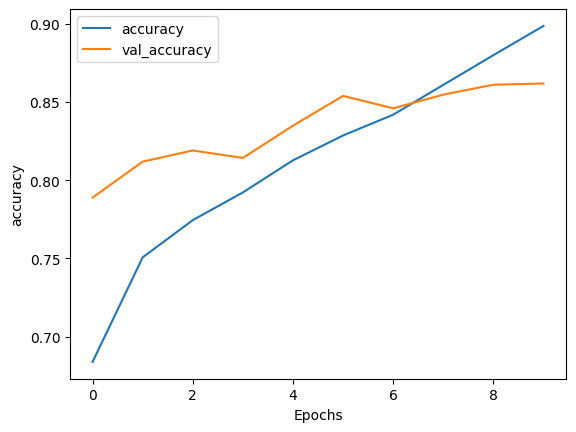

In [36]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

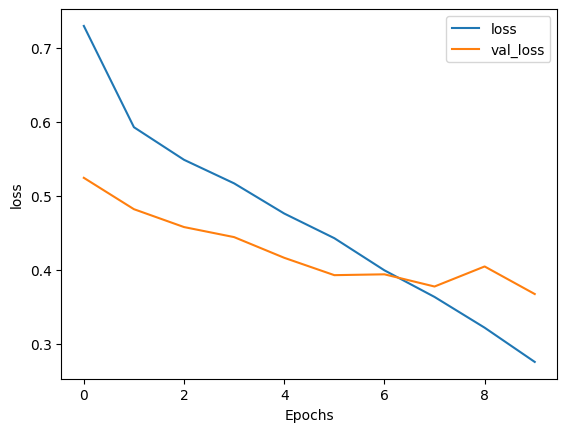

In [37]:
plot_graphs(history, "loss")

In [38]:
## test model with predict one example sentence
sample_text = ["timnas main ini mainnya jelek passing salah mulu ya begitu gambaran timnas tanpa sty"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 2:
        return 'positive'
    if predict == 1:
        return 'negative'
    if predict == 0:
        return 'neutral'
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[0.01985468 0.9765429  0.00360237]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
negative


In [39]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1260,)
(1260, 3)
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       131
           1       0.80      0.83      0.81       394
           2       0.90      0.91      0.91       735

    accuracy                           0.86      1260
   macro avg       0.84      0.81      0.82      1260
weighted avg       0.86      0.86      0.86      1260



In [56]:
# Mendapatkan bobot antara GlobalMaxPooling1D dan Dense(16)
pooling_to_dense16_weights = model.layers[1].get_weights()[0]
pooling_to_dense16_bias = model.layers[1].get_weights()[1]

# Mendapatkan bobot antara Dense(16) dan Dense(3)
dense16_to_dense3_weights = model.layers[3].get_weights()[0]
dense16_to_dense3_bias = model.layers[3].get_weights()[1]

print("Bobot antara GlobalMaxPooling1D dan Dense(16):")
print(pooling_to_dense16_weights)
# print(pooling_to_dense16_bias)

print("\nBobot antara Dense(16) dan Dense(3):")
print(dense16_to_dense3_weights)
# print(dense16_to_dense3_bias)


Bobot antara GlobalMaxPooling1D dan Dense(16):
[[[-1.18215330e-01  9.29954275e-02  3.28398012e-02 -3.96327637e-02
    1.19079620e-01 -8.51108655e-02 -1.79538932e-02 -2.02226210e-02
    2.74487883e-02  7.72384331e-02  6.34068772e-02 -7.28226379e-02
    2.36315522e-02  5.99825084e-02  4.62313667e-02  1.35574698e-01
    9.34952348e-02 -3.07625663e-02  1.56031057e-01 -5.64953946e-02
   -3.93807255e-02 -9.03590545e-02 -9.55724902e-03 -3.20956334e-02
    5.63848428e-02  1.27059877e-01  5.13058379e-02  3.94210499e-03
    1.83843765e-02 -5.33858724e-02  8.40714574e-02  3.77703682e-02
   -6.01340495e-02  2.19350234e-02  6.40088394e-02  3.12889144e-02
    3.19132544e-02  1.02439202e-01  5.52118979e-02  2.10215095e-02
    4.39179223e-03 -6.25648126e-02  2.56680455e-02  1.41658038e-01
    4.03725617e-02  3.30674350e-02  1.85635053e-02  1.85769908e-02
    2.94140186e-02  4.21643183e-02  1.43961847e-01 -3.52306142e-02
    1.49129229e-02  4.57762703e-02 -1.81714259e-02 -3.10026780e-02
   -1.28542811e

In [82]:
#save model
model.save('./model/model-cnn-word2vec-3-classes.h5')

In [35]:
import numpy as np

# Jumlah neuron pada lapisan input
input_neurons = 8

# Jumlah neuron pada lapisan tersembunyi
hidden_neurons = 16

# Inisialisasi bobot secara acak dengan distribusi uniform dari -1 hingga 1
weight_matrix = np.random.uniform(low=-1, high=1, size=(input_neurons, hidden_neurons))

# Membulatkan nilai bobot menjadi bilangan bulat
rounded_weight_matrix = np.round(weight_matrix, 2)

print("Weight matrix shape:", rounded_weight_matrix.shape)
print("Weight matrix values:\n", rounded_weight_matrix)



Weight matrix shape: (8, 16)
Weight matrix values:
 [[-0.58 -0.18  0.68 -0.11 -0.06 -0.49 -0.54  0.65 -0.33 -0.06  0.24  0.22
  -0.73 -0.16 -0.1   0.95]
 [ 0.28 -0.56 -0.18  0.55 -0.16 -0.8  -0.14 -0.45  0.95 -0.51 -0.88  0.6
  -0.09  0.11  0.91  0.96]
 [ 0.96  0.11  0.43  0.34 -0.72 -0.35 -0.07  0.16 -0.62  0.29  0.92  0.8
  -0.51 -0.56 -0.08  0.95]
 [-0.88  0.39 -0.91  0.86 -0.57  0.18 -0.42 -0.61  0.45  0.26 -0.87 -0.98
   0.85 -0.21 -0.02  0.04]
 [-0.11 -0.39 -0.56  0.54  0.01  0.52  0.17 -0.15 -0.31  0.82 -0.71 -0.88
  -0.87 -0.92  0.42  0.04]
 [-0.51 -0.79 -0.03 -0.31  0.15  0.01  0.61 -0.87 -0.86 -0.18  0.41  0.6
   0.59  0.12 -0.99 -0.83]
 [-0.27  0.63 -0.25  0.61  0.18 -0.02  0.38  0.4   0.79  0.21  0.95 -0.31
   0.49 -1.   -0.19  0.61]
 [-0.02 -0.52 -0.29 -0.19 -0.27 -0.82 -0.69 -0.39 -0.13 -0.21  0.46 -0.79
   0.01 -0.01  0.67 -0.6 ]]


In [53]:
import numpy as np

# Fungsi aktivasi ReLU
def relu(x):
    return np.maximum(0, x)

# Input
input_vector = np.array([0.16, 0.24, 0.11, 0.2, 0.25, 0.18, 0.29, 0.27])

# Weight matrix
weight_matrix = np.array([[-0.58, -0.18, 0.68, -0.11, -0.06, -0.49, -0.54, 0.65, -0.33, -0.06, 0.24, 0.22, -0.73, -0.16, -0.1, 0.95],
                          [0.28, -0.56, -0.18, 0.55, -0.16, -0.8, -0.14, -0.45, 0.95, -0.51, -0.88, 0.6, -0.09, 0.11, 0.91, 0.96],
                          [0.96, 0.11, 0.43, 0.34, -0.72, -0.35, -0.07, 0.16, -0.62, 0.29, 0.92, 0.8, -0.51, -0.56, -0.08, 0.95],
                          [-0.88, 0.39, -0.91, 0.86, -0.57, 0.18, -0.42, -0.61, 0.45, 0.26, -0.87, -0.98, 0.85, -0.21, -0.02, 0.04],
                          [-0.11, -0.39, -0.56, 0.54, 0.01, 0.52, 0.17, -0.15, -0.31, 0.82, -0.71, -0.88, -0.87, -0.92, 0.42, 0.04],
                          [-0.51, -0.79, -0.03, -0.31, 0.15, 0.01, 0.61, -0.87, -0.86, -0.18, 0.41, 0.6, 0.59, 0.12, -0.99, -0.83],
                          [-0.27, 0.63, -0.25, 0.61, 0.18, -0.02, 0.38, 0.4, 0.79, 0.21, 0.95, -0.31, 0.49, -1., -0.19, 0.61],
                          [-0.02, -0.52, -0.29, -0.19, -0.27, -0.82, -0.69, -0.39, -0.13, -0.21, 0.46, -0.79, 0.01, -0.01, 0.67, -0.6]])

# Hitung feedforward
print(np.dot(input_vector, weight_matrix))
output_vector = relu(np.dot(input_vector, weight_matrix))

print("Output vector:")
print(output_vector)


[-0.299  -0.2705 -0.3653  0.5286 -0.2324 -0.3683 -0.1355 -0.2918  0.1587
  0.1287  0.0504 -0.344   0.009  -0.6039  0.2422  0.3704]
Output vector:
[0.     0.     0.     0.5286 0.     0.     0.     0.     0.1587 0.1287
 0.0504 0.     0.009  0.     0.2422 0.3704]


In [27]:
# Jumlah neuron pada lapisan input
hidden_neurons = 16

# Jumlah neuron pada lapisan tersembunyi
output_neurons = 3

# Inisialisasi bobot secara acak dengan distribusi uniform dari -1 hingga 1
weight_matrix = np.random.uniform(low=-1, high=1, size=(hidden_neurons, output_neurons))

# Membulatkan nilai bobot menjadi bilangan bulat
rounded_weight_matrix = np.round(weight_matrix, 2)

print("Weight matrix shape:", rounded_weight_matrix.shape)
print("Weight matrix values:\n", rounded_weight_matrix)

Weight matrix shape: (16, 3)
Weight matrix values:
 [[ 0.47 -0.6  -0.69]
 [ 0.37  0.06 -0.79]
 [ 0.58  0.24 -0.8 ]
 [-0.11 -0.27  0.9 ]
 [-0.94 -0.22 -0.62]
 [-0.92  0.07 -0.09]
 [-0.66 -0.9   0.94]
 [-0.11 -0.97 -0.84]
 [ 0.16  0.29  0.64]
 [ 0.81  0.7   0.02]
 [ 0.02 -0.43  0.28]
 [-0.67 -0.    0.35]
 [-0.21 -0.2  -0.5 ]
 [-0.59 -0.65  0.28]
 [ 0.17  0.28  0.52]
 [ 0.9   0.75  0.22]]


In [49]:

# Input
input_vector = np.array([0., 0., 0., 0.5286, 0., 0., 0., 0., 0.1587, 0.1287, 0.0504, 0., 0.009, 0., 0.2422, 0.3704])

# Weight matrix
weight_matrix = np.array([[-0.05, -0.63, 0.07],
                          [0.24, 0.26, -0.91],
                          [0.2, -0.53, -0.29],
                          [-0.84, 0.96, 0.27],
                          [-0.97, -0.53, 0.92],
                          [0.36, -0.6, -0.81],
                          [0.72, -0.05, -0.15],
                          [0.35, 0.01, -0.04],
                          [-0.42, 0.15, 0.7],
                          [-0.28, 0.34, 0.96],
                          [0.64, 0.95, -0.04],
                          [-0.88, -0.97, 0.53],
                          [0.68, 0.65, 0.65],
                          [0.44, 0.98, -0.48],
                          [0.07, 0.22, -0.24],
                          [0.02, -0.45, -0.85]])

# Fungsi softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Mengupdate bobot secara acak hingga output vektor softmax pada indeks ke-2 lebih besar dari yang lainnya
while True:
    # Mendapatkan output vector dengan bobot yang terbaru
    output_vector = softmax(np.dot(input_vector, weight_matrix))
    
    # Jika output vektor pada indeks ke-2 lebih besar daripada yang lainnya, hentikan loop
    if output_vector[2] > output_vector[0] and output_vector[2] > output_vector[1]:
        break
    
    # Jika tidak, update bobot secara acak
    weight_matrix = np.random.uniform(low=-1.0, high=1.0, size=weight_matrix.shape)

print("\nUpdated weight matrix:")
print(weight_matrix)
print("\nOutput vector (softmax):")
print(output_vector)



Updated weight matrix:
[[-0.70654596 -0.70762012  0.36822115]
 [ 0.81475569  0.69468621  0.04757525]
 [ 0.92954148 -0.12318721  0.67479858]
 [-0.04285448 -0.51714005  0.74271841]
 [-0.95403308 -0.94264083 -0.65790128]
 [ 0.58578483 -0.08154155  0.16821591]
 [ 0.82759568  0.65449343  0.1202224 ]
 [ 0.68483451  0.06266874  0.65968445]
 [ 0.37949734 -0.87503093  0.86484684]
 [ 0.31645606  0.40149455 -0.60867374]
 [-0.95179654  0.98575088  0.9477918 ]
 [-0.01294139  0.8706095  -0.60559229]
 [ 0.63435696 -0.60971967  0.89935223]
 [-0.47892085 -0.26589078 -0.76613313]
 [-0.26995794 -0.4415813   0.83511742]
 [ 0.23399771  0.52915235  0.34626583]]

Output vector (softmax):
[0.25412936 0.19117719 0.55469344]
